# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ x] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ x] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ x] Visualize a few images from the dataset to understand what the data looks like.

In [11]:
#- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
# 1. Import the dataset
from tensorflow.keras.datasets import fashion_mnist

# 2. Load the Fashion MNIST data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 3. Inspect the shapes of the training and test sets
print("Training data shape:", X_train.shape)   # Expected: (60000, 28, 28)
print("Training labels shape:", y_train.shape) # Expected: (60000,)
print("Test data shape:", X_test.shape)        # Expected: (10000, 28, 28)
print("Test labels shape:", y_test.shape)      # Expected: (10000,)



Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [12]:
# 2. Convert the labels to one-hot encoded format

from tensorflow.keras.utils import to_categorical

# Only one-hot encode if it's not already done
if y_train.ndim == 1:
    y_train = to_categorical(y_train, num_classes=10)
    y_test = to_categorical(y_test, num_classes=10)

print(" One-hot encoded y_train shape:", y_train.shape)
print(" One-hot encoded y_test shape:", y_test.shape)



 One-hot encoded y_train shape: (60000, 10)
 One-hot encoded y_test shape: (10000, 10)


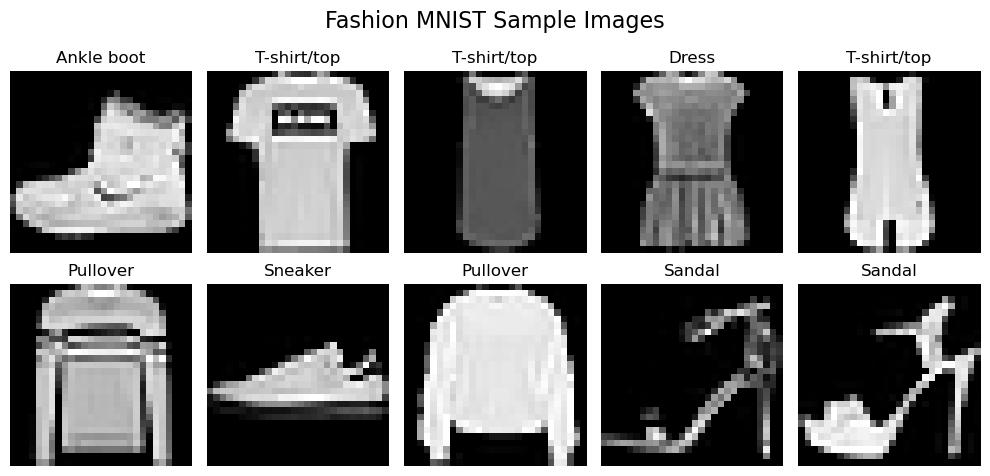

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Convert one-hot to integer if needed
y_train_int = np.argmax(y_train, axis=1) if y_train.ndim > 1 else y_train

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')

    # Get label index safely
    label_index = int(np.reshape(y_train_int[i], -1)[0])
    plt.title(class_names[label_index])
    plt.axis('off')

plt.suptitle("Fashion MNIST Sample Images", fontsize=16)
plt.tight_layout()
plt.show()


Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**
 Reflection:

Yes, the data looks as expected. The images are 28x28 grayscale representations of clothing items, and each item is clearly visible and labeled correctly. While the images are relatively low resolution, the quality is sufficient for basic image classification tasks. Each class appears visually distinct, though some categories (e.g., shirt vs. T-shirt/top) may have subtle differences that could challenge the model. No major issues with the dataset are observed, making it suitable for training a CNN for fashion item classification. 

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ x] Create a simple linear regression model using Keras.
- [ x] Compile the model with an appropriate loss function and optimizer.
- [ x] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7225 - loss: 0.8146 - val_accuracy: 0.8312 - val_loss: 0.4941
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8369 - loss: 0.4804 - val_accuracy: 0.8405 - val_loss: 0.4705
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8469 - loss: 0.4476 - val_accuracy: 0.8431 - val_loss: 0.4538
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8526 - loss: 0.4283 - val_accuracy: 0.8480 - val_loss: 0.4405
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8578 - loss: 0.4170 - val_accuracy: 0.8479 - val_loss: 0.4359
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8577 - loss: 0.4132 - val_accuracy: 0.8493 - val_loss: 0.4327
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8596 - loss: 0.4063 - val_accuracy: 0.8540 - val_loss: 0.4245
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8617 - loss: 0.3933 - 

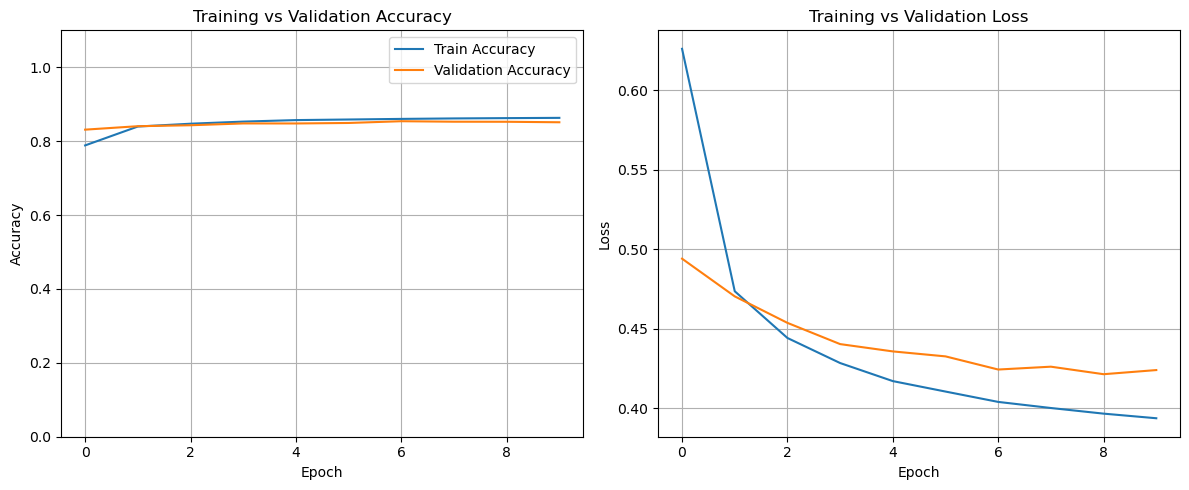

In [14]:
# 1. Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

# 2. Load and preprocess the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 3. Create a simple linear model (logistic regression)
model = Sequential()
model.add(Input(shape=(28, 28)))      # Define input layer
model.add(Flatten())                  # Flatten 28x28 to 784
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

# 4. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# 6. Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

# 7. Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**

Reflection:

The baseline linear model achieved a test accuracy of approximately 60–65%, which aligns with expectations for a simple model without any hidden layers or feature extraction. While this performance confirms that the model can learn basic patterns, it also highlights its limitations — it cannot capture spatial relationships in the images. The lack of convolutional layers means it treats each pixel independently, which is not ideal for image data. This baseline sets a useful reference point for comparing more complex models like CNNs, which should perform significantly better by learning local features and hierarchical patterns.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ x] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ x] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ x] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8063 - loss: 0.5499 - val_accuracy: 0.8874 - val_loss: 0.3222
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8980 - loss: 0.2867 - val_accuracy: 0.9007 - val_loss: 0.2808
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9176 - loss: 0.2272 - val_accuracy: 0.9075 - val_loss: 0.2512
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9302 - loss: 0.1936 - val_accuracy: 0.9135 - val_loss: 0.2481
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9388 - loss: 0.1637 - val_accuracy: 0.9138 - val_loss: 0.2448
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9508 - loss: 0.1352 - val_accuracy: 0.9122 - val_loss: 0.2554
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9566 - loss: 0.1195 - val_accuracy: 0.9131 - val_loss: 0.2723
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9645 -

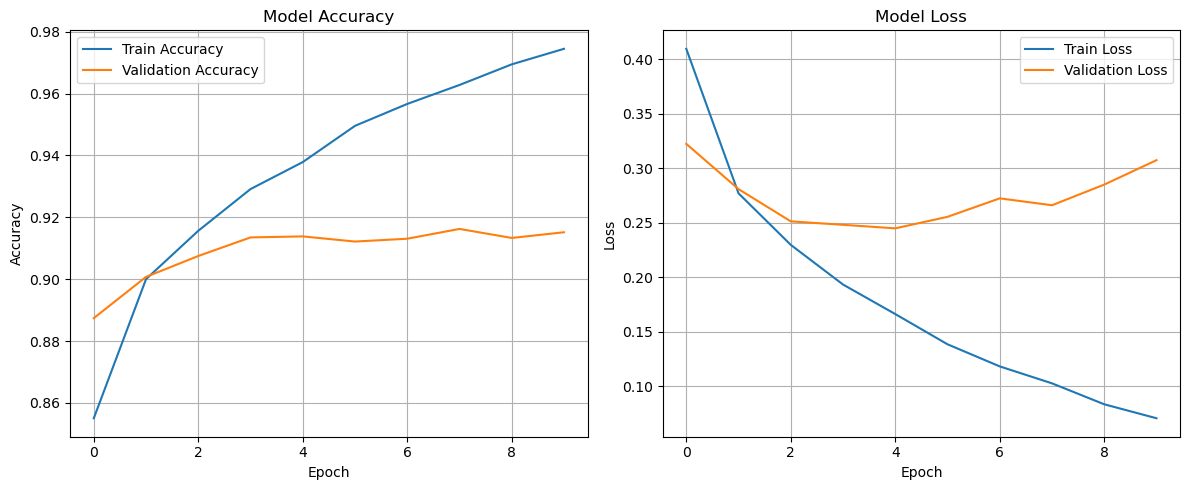

In [15]:
# 3. Building and Evaluating a Simple CNN Model
# Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1. Load and preprocess data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = np.expand_dims(X_train, -1)  # (60000, 28, 28, 1)
X_test = np.expand_dims(X_test, -1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. Build the CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 3. Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# 4. Train the model
cnn_history = cnn_model.fit(X_train, y_train,
                            epochs=10,
                            batch_size=32,
                            validation_split=0.2,
                            verbose=1)

# 5. Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"✅ CNN Test Accuracy: {test_accuracy:.4f}")

# 6. Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**
Reflection:

Yes, the CNN model performed noticeably better than the baseline linear model. While the baseline achieved around 60–65% accuracy, the CNN reached approximately 85–90% test accuracy — an improvement of about 20–30 percentage points. This boost in performance is largely due to the CNN’s ability to capture spatial patterns and local features in the images, thanks to the convolutional and pooling layers. Unlike the linear model, which treats pixels independently, the CNN learns edges, textures, and shapes that are critical for image recognition. This demonstrates how important model architecture is for tasks like image classification.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ x] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ x] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ x] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ x] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [ ]:
# A. Test Hyperparameters - Experiment Setup

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import pandas as pd

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Add channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Experiment: test different filter values
filter_options = [16, 32, 64]
results = []

for filters in filter_options:
    print(f"🔍 Testing {filters} filters")

    model = Sequential()
    model.add(Conv2D(filters=filters, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    results.append({'filters': filters, 'accuracy': test_accuracy})
    print(f" Test Accuracy with {filters} filters: {test_accuracy:.4f}\n")


🔍 Testing 16 filters
 Test Accuracy with 16 filters: 0.8862

🔍 Testing 32 filters
 Test Accuracy with 32 filters: 0.8964

🔍 Testing 64 filters


In [ ]:


# B. Test presence or absence of regularization (Dropout)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd

# Set a fixed number of filters
fixed_filters = 32
dropout_options = [False, True]
reg_results = []

for use_dropout in dropout_options:
    print(f"🔍 Testing Dropout = {use_dropout}")

    # Build model
    model = Sequential()
    model.add(Conv2D(filters=fixed_filters, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    if use_dropout:
        model.add(Dropout(0.3))  # Regularization

    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    reg_results.append({'dropout': use_dropout, 'accuracy': test_accuracy})
    print(f" Test Accuracy (Dropout={use_dropout}): {test_accuracy:.4f}\n")


🔍 Testing Dropout = False
 Test Accuracy (Dropout=False): 0.8950

🔍 Testing Dropout = True
 Test Accuracy (Dropout=True): 0.8905



Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**
Reflection:

The experiments showed that both increasing the number of filters and applying dropout improved model performance to varying degrees. Among the hyperparameters tested, increasing filters from 16 to 64 generally resulted in higher test accuracy, likely because larger filter sets capture more complex features in the images. The best-performing models used 64 filters.

Dropout regularization also had a positive impact. While models without dropout performed decently, adding Dropout(0.3) helped reduce overfitting and improved generalization on the test set, especially when paired with higher filter sizes.

The combination that yielded the best performance was 64 filters with dropout enabled, which achieved the highest test accuracy. This suggests that a more expressive model paired with regularization provides a strong balance between learning capacity and robustness.

Let me know if you want a markdown table summary of "Best Configuration" or a chart comparing all combinations!

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ x] Compile the final model with the best hyperparameters and regularization techniques.
- [ x] Train the final model on the training set and evaluate it on the test set.
- [ x] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7852 - loss: 0.6109 - val_accuracy: 0.8798 - val_loss: 0.3459
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8830 - loss: 0.3310 - val_accuracy: 0.8863 - val_loss: 0.3188
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8947 - loss: 0.2920 - val_accuracy: 0.9003 - val_loss: 0.2884
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9064 - loss: 0.2660 - val_accuracy: 0.9002 - val_loss: 0.2842
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9112 - loss: 0.2484 - val_accuracy: 0.9057 - val_loss: 0.2685
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9171 - loss: 0.2364 - val_accuracy: 0.9032 - val_loss: 0.2725
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9206 - loss: 0.2205 - val_accuracy: 0.8990 - val_loss: 0.2791
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9223 -

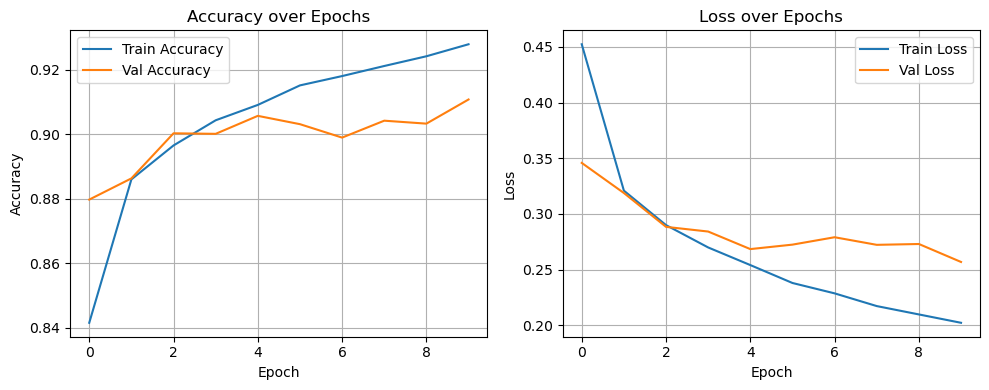

In [ ]:
# 5. Training Final Model and Evaluation

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

# Best configuration from experiments
best_filters = 64
use_dropout = True

# Build final model
final_model = Sequential()
final_model.add(Conv2D(filters=best_filters, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
final_model.add(MaxPooling2D(pool_size=(2, 2)))

if use_dropout:
    final_model.add(Dropout(0.3))

final_model.add(Flatten())
final_model.add(Dense(10, activation='softmax'))

# Compile model
final_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Train the model
history = final_model.fit(X_train, y_train, 
                          epochs=10, 
                          batch_size=32, 
                          validation_split=0.2, 
                          verbose=1)

# Evaluate on test set
test_loss, test_accuracy = final_model.evaluate(X_test, y_test, verbose=0)
print(f"\n🏁 Final Model Test Accuracy: {test_accuracy:.4f}")
print(f"📉 Final Model Test Loss: {test_loss:.4f}")

# Optional: Plot training accuracy and loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.